# What are the busiest times of the year to visit Seattle? By how much do prices spike ?
In order to answer our question we will analyse the variables listing_id and date in the reviews dataset. and the variables listing id, data and price in the calender dataset.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Pretty display for notebooks
%matplotlib inline
% config InlineBachend.figure_format = 'retina'

# Exploring the Data

In [2]:
# Load the nessesary data.
df_1 = pd.read_csv('reviews.csv', parse_dates=['date'])[['listing_id', 'date']]
df_2 = pd.read_csv('calendar.csv', parse_dates=['date'])[[
    'listing_id', 'date', 'price']]

In [3]:
# Print the five ferst rows
df_1.head()

,listing_id,date
0,7202016,2015-07-19
1,7202016,2015-07-20
2,7202016,2015-07-26
3,7202016,2015-08-02
4,7202016,2015-08-10


In [4]:
df_2.head()

,listing_id,date,price
0,241032,2016-01-04,$85.00
1,241032,2016-01-05,$85.00
2,241032,2016-01-06,NaN
3,241032,2016-01-07,NaN
4,241032,2016-01-08,NaN


In [5]:
# Data shape
print("df_1 shape : ", df_1.shape)
print("df_2 shape : ", df_2.shape)

df_1 shape :  (84849, 2)
df_2 shape :  (1393570, 3)


# The date range in each dataset

In [6]:
# Get the date range in df_1
res_freq = pd.DataFrame(df_1['date'].value_counts().values,
                        index=df_1['date'].value_counts().index,
                        columns=['rev_num'])
res_freq_year = res_freq.resample('A').sum()
# Print values
res_freq_year

,rev_num
2009-12-31,17
2010-12-31,254
2011-12-31,1169
2012-12-31,3251
2013-12-31,7077
2014-12-31,20365
2015-12-31,52493
2016-12-31,223


In [7]:
# Get the date range in df_1
cal_freq = pd.DataFrame(df_2['date'].value_counts().values,
                        index=df_2['date'].value_counts().index,
                        columns=['price_num'])
cal_freq_year = cal_freq.resample('A').sum()
# Print values
cal_freq_year

,price_num
2016-12-31,1385934
2017-12-31,7636


From the analyse done above we may notice : - The reviews dataset contains information between 2009 and 2016. - The calendar dataset contains information between 2016 and 2017. - The year 2015 contains the highest number of information recorded in the reviews dataset. - The year 2016 contains the highest number of information recorded in the calendar dataset.

Therfore we will use the year 2015 to analyse the busiest times of the year to visit Seattle. And the year 2016 to analyse the price variation during the year.

# What are the busiest times of the year to visit Seattle ?

# Preparing the Data

In [8]:
# Selct the year 2015
res_freq_2015 = res_freq.loc['2015']
# The reservation sum per month
res_2015_month = res_freq_2015.resample('M').sum()
res_2015_month['% rev'] = res_2015_month['rev_num']*100/res_2015_month[
    'rev_num'].sum()
# Print values
res_2015_month

,rev_num,% rev
2015-01-31,1717,3.270912
2015-02-28,1662,3.166136
2015-03-31,2682,5.109253
2015-04-30,2700,5.143543
2015-05-31,3770,7.181910
2015-06-30,5549,10.570933
2015-07-31,6580,12.535005
2015-08-31,7963,15.169642
2015-09-30,6985,13.306536
2015-10-31,5536,10.546168


# Plot the Data

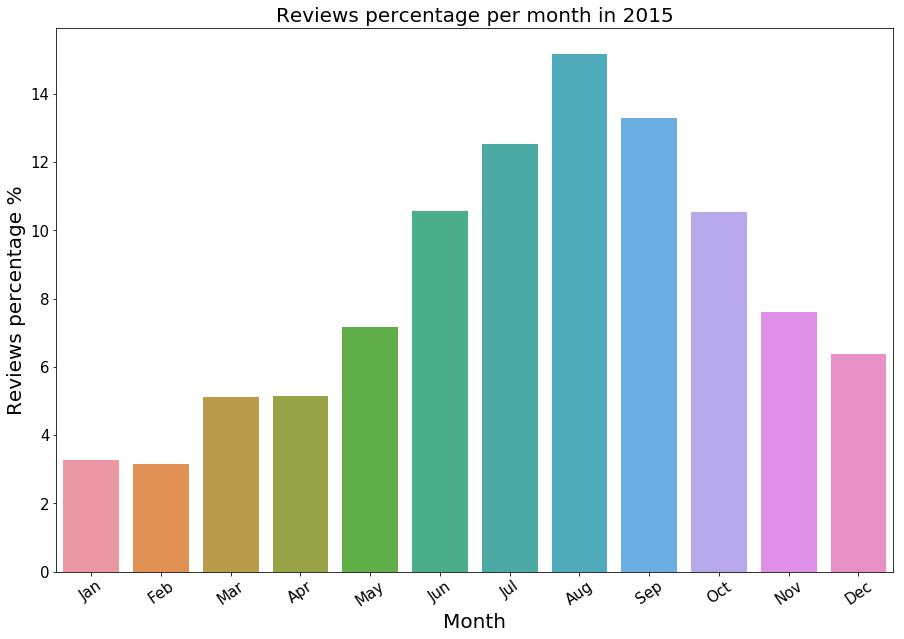

In [20]:
# Bar plot
fig1 = plt.figure(figsize=(15, 10))
ax = fig1.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=res_2015_month.index, y=res_2015_month['% rev'])

# Set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('Reviews percentage %', weight='normal', size=20)
plt.title('Reviews percentage per month in 2015', fontsize=20)

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
plt.show()

# How much do prices spike?
To answer thi question we will study the curve of prises per moth in 2016.

# Preparing the Data

In [10]:
# Index data by date
df_2.index = df_2['date']

# Get data for 2016
df_2016 = df_2.loc['2016']

# Percentage of missing values
df_2016.isnull().mean()

listing_id    0.000000
date          0.000000
price         0.329806
dtype: float64

clean the data

In [11]:
# Drop missig values
df_2016_no_nul = df_2016.dropna()

# Preprocess the price variable
df_2016_no_nul['price'] = df_2016_no_nul['price'].apply(
    lambda x: float(x[1:].replace(',', '')))
df_2016_no_nul = df_2016_no_nul[['price']]

# Print the first five rows
df_2016_no_nul.head()

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price
date,
2016-01-04,85.0
2016-01-05,85.0
2016-01-13,85.0
2016-01-14,85.0
2016-01-18,85.0


In [12]:
# The price
print("Price min : ",  df_2016_no_nul['price'].min())
print("Price max : ",  df_2016_no_nul['price'].max())
print("Price mean : ",  df_2016_no_nul['price'].mean())

Price min :  10.0
Price max :  1650.0
Price mean :  137.95137504252597


In [13]:
# Resemple data by month
df_2016_month = df_2016_no_nul.resample('M').mean()
# difference between the price mean per month and the price mean
df_2016_month['diff mean'] = df_2016_month['price'] \
    - df_2016_no_nul['price'].mean()

# Print data
df_2016_month

,price,diff mean
date,,
2016-01-31,121.568409,-16.382966
2016-02-29,124.293927,-13.657448
2016-03-31,128.644488,-9.306887
2016-04-30,135.097005,-2.854370
2016-05-31,139.538183,1.586808
2016-06-30,147.473137,9.521762
2016-07-31,152.094150,14.142775
2016-08-31,150.656594,12.705219
2016-09-30,143.255949,5.304573


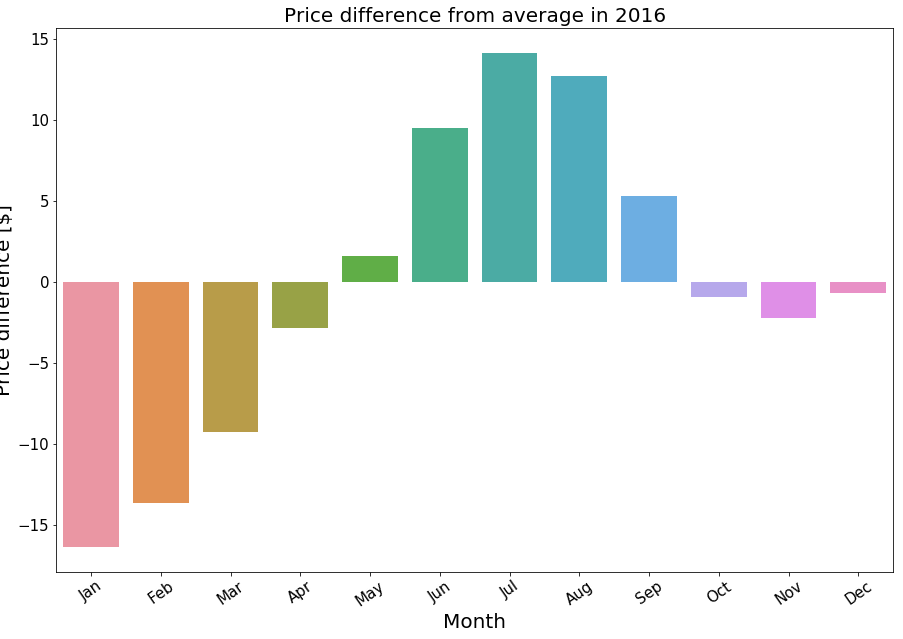

In [21]:
# Plot the price difference
fig2 = plt.figure(figsize=(15, 10))
ax = fig2.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_2016_month.index, y=df_2016_month['diff mean'])
# Set axis label properties
ax.set_xlabel('Month', weight='normal', size=20)
ax.set_ylabel('Price difference [$]', weight='normal', size=20)
plt.title('Price difference from average in 2016', fontsize=20)

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set tick label properties
ax.tick_params('x', labelsize=15, rotation=35)
ax.tick_params('y', labelsize=15)
plt.show()